In [23]:
import twint
import pandas as pd

import nest_asyncio
nest_asyncio.apply()


In [24]:
t = twint.Config()
t.Username = 'ImranKhanPTI' #For specific user
t.Pandas = True

In [25]:
t.Limit = 100
twint.run.Search(t)
twint.storage.panda.Tweets_df.to_csv("Ik_twitter_data.csv")

1578427004592214018 2022-10-07 21:48:18 +0500 <ImranKhanPTI> سب سے بڑھ کر تو یہ کہ انہوں نے اپنے 1100 ارب مالیت کے کرپشن کیسز سے خود کو استثنیٰ دلوایا ہے۔
1578426999257059329 2022-10-07 21:48:17 +0500 <ImranKhanPTI> میانوالی اسلام آباد کیجانب دس لاکھ لوگوں کےمارچ کی تیاری کرتےہوئے! مجرموں کی امپورٹڈسرکار، جس نےمعیشت کا دیوالہ نکال دیا ہے اور عوام کو بدترین مہنگائی تلے کچل ڈالا ہے، کیخلاف یہ ہماری تاریخ کا سب سے بڑا احتجاج ہوگا، انشاءاللہ۔  https://t.co/f93VeUZNcF
1578419867664777217 2022-10-07 21:19:56 +0500 <ImranKhanPTI> Above all they have given themselves immunity from their corruption cases worth 1100 billion.
1578419863139549184 2022-10-07 21:19:55 +0500 <ImranKhanPTI> Mianwali getting ready for the million people march to Islamabad. InshaAllah it  will be the greatest protest in our history against an  Imported govt of crooks who have bankrupted the economy &amp; crushed the people under unprecedented inflation.  https://t.co/Jb7I7ev7ZL
1577717205000753172 2022-10-05 22:47:48 +0

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.


In [26]:
df = pd.read_csv("Ik_twitter_data.csv")

In [27]:
df.shape

(40, 39)

### Grabing Only English tweets Data

In [28]:
english_tweets_data = df[df['language'] == 'en']
english_tweets_data.shape

(19, 39)

In [29]:
english_tweets_data.head(4)

,Unnamed: 0,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
2,2,1578419867664777217,1578419863139549184,1.665160e+12,2022-10-07 21:19:56,500,NaN,Above all they have given themselves immunity ...,en,[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,3,1578419863139549184,1578419863139549184,1.665160e+12,2022-10-07 21:19:55,500,NaN,Mianwali getting ready for the million people ...,en,[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
5,5,1577709095880167424,1577709095880167424,1.664990e+12,2022-10-05 22:15:35,500,NaN,While our Ehsaas social welfare programmes wer...,en,[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
8,8,1577376975697625107,1577376972589645828,1.664911e+12,2022-10-05 00:15:51,500,NaN,ABA number for wire transfer 113024009 In add...,en,[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [30]:
english_tweets_data.columns

Index(['Unnamed: 0', 'id', 'conversation_id', 'created_at', 'date', 'timezone',
       'place', 'tweet', 'language', 'hashtags', 'cashtags', 'user_id',
       'user_id_str', 'username', 'name', 'day', 'hour', 'link', 'urls',
       'photos', 'video', 'thumbnail', 'retweet', 'nlikes', 'nreplies',
       'nretweets', 'quote_url', 'search', 'near', 'geo', 'source',
       'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date',
       'translate', 'trans_src', 'trans_dest'],
      dtype='object')

### Tweets data Only

In [31]:
en_tweets = english_tweets_data[['tweet']]

In [32]:

en_tweets.head(5)

,tweet
2,Above all they have given themselves immunity ...
3,Mianwali getting ready for the million people ...
5,While our Ehsaas social welfare programmes wer...
8,ABA number for wire transfer 113024009 In add...
9,I thank our overseas donors who waited patient...


### Using NLTK for word tokenizing and stopwords removal

In [33]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

### Applying word_tokenizer on tweets

In [34]:
sents = []
for sent in en_tweets.values:
    word = word_tokenize(sent[0])
    sents.append(word)
    

In [35]:
sents

[['Above',
  'all',
  'they',
  'have',
  'given',
  'themselves',
  'immunity',
  'from',
  'their',
  'corruption',
  'cases',
  'worth',
  '1100',
  'billion',
  '.'],
 ['Mianwali',
  'getting',
  'ready',
  'for',
  'the',
  'million',
  'people',
  'march',
  'to',
  'Islamabad',
  '.',
  'InshaAllah',
  'it',
  'will',
  'be',
  'the',
  'greatest',
  'protest',
  'in',
  'our',
  'history',
  'against',
  'an',
  'Imported',
  'govt',
  'of',
  'crooks',
  'who',
  'have',
  'bankrupted',
  'the',
  'economy',
  '&',
  'amp',
  ';',
  'crushed',
  'the',
  'people',
  'under',
  'unprecedented',
  'inflation',
  '.',
  'https',
  ':',
  '//t.co/Jb7I7ev7ZL'],
 ['While',
  'our',
  'Ehsaas',
  'social',
  'welfare',
  'programmes',
  'were',
  'being',
  'appreciated',
  'internationally',
  ',',
  'under',
  'Imported',
  'govt',
  'all',
  'our',
  'efforts',
  'to',
  'make',
  'Pak',
  'a',
  'welfare',
  'state',
  'are',
  'being',
  'reversed',
  '.',
  'Most',
  'shocking'

### Removing Stops Words

In [36]:
stop_words = set(stopwords.words('english'))
filtered_sent = []
for w in sents:
    for word in w:
        if not word.lower() in stop_words:
            filtered_sent.append(word)

In [37]:
for word in filtered_sent:
    print(word)
    

given
immunity
corruption
cases
worth
1100
billion
.
Mianwali
getting
ready
million
people
march
Islamabad
.
InshaAllah
greatest
protest
history
Imported
govt
crooks
bankrupted
economy
&
amp
;
crushed
people
unprecedented
inflation
.
https
:
//t.co/Jb7I7ev7ZL
Ehsaas
social
welfare
programmes
appreciated
internationally
,
Imported
govt
efforts
make
Pak
welfare
state
reversed
.
shocking
Maryam
's
instruction
SS
stop
funding
health
insurance
card
.
https
:
//t.co/Y3gwS1iPxB
ABA
number
wire
transfer
113024009
addition
newly
established
foundation
,
continue
receive
funds
accounts
set
respective
CMs
Punjab
&
amp
;
Khyber
Pakhtunkhwa
.
several
ways
donate
outlined
:
https
:
//t.co/3styOIlfaW
thank
overseas
donors
waited
patiently
setting
account
facilitate
flood-relief
donations
.
Details
follows
:
Title
:
Insaf
Relief
Foundation
.
7004109
Southwestern
National
Bank
;
2951
West
Ball
Road
,
Suite
100
Anaheim
,
CA
92804
tel:714-822-6101
also
want
thank
millions
donors
&
amp
;
supporters
make
p

## Using Spacy to apply NER and Lematization

In [38]:
import spacy
import re

In [39]:
nlp = spacy.load("en_core_web_sm")

In [40]:
text = ""
for w in filtered_sent:
    text= text + w + " "

text2 = ""
for i in re.findall("[a-zA-Z]*",text):
    if i != "":
        text2 = text2+i + " "

In [41]:
doc = nlp(text2)
label = [(X.text,X.label_) for X in doc.ents]
df4 = pd.DataFrame(label,columns = ['Word','Entity'])
df5 = df4[df4['Entity'] == "ORG"]
df6 = df5['Word'].value_counts()

### Data Visualization 

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\munir\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


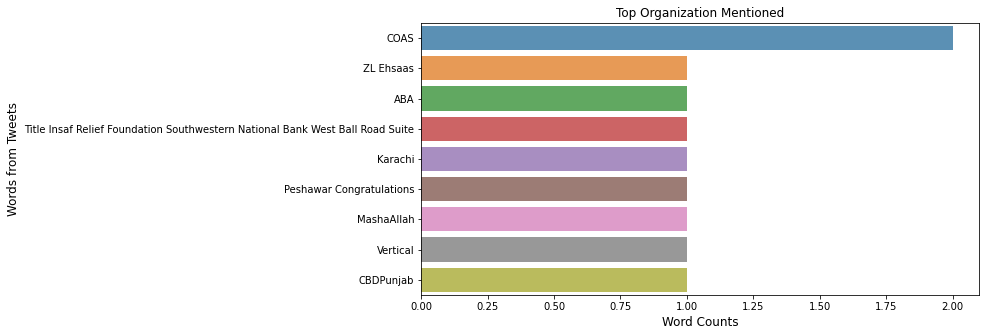

In [43]:
V_data = df6
plt.figure(figsize =(10,5))
sns.barplot(V_data.values,V_data.index,alpha=0.8)
plt.title("Top Organization Mentioned")
plt.ylabel("Words from Tweets",fontsize=12)
plt.xlabel('Word Counts',fontsize=12)
plt.show()

In [44]:
en_tweets.head(5)
  

,tweet
2,Above all they have given themselves immunity ...
3,Mianwali getting ready for the million people ...
5,While our Ehsaas social welfare programmes wer...
8,ABA number for wire transfer 113024009 In add...
9,I thank our overseas donors who waited patient...


In [45]:
def clearText(text):
    text = re.sub(r'&amp;+','',text)
    text = re.sub(r'#','',text)
    text = re.sub(r'https?:\/\/\S+','',text)
    
    return text

en_tweets["Tweets"] = en_tweets['tweet'].apply(clearText)

en_tweets

C:\Users\munir\AppData\Local\Temp/ipykernel_8516/1431495316.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  en_tweets["Tweets"] = en_tweets['tweet'].apply(clearText)


,tweet,Tweets
2,Above all they have given themselves immunity ...,Above all they have given themselves immunity ...
3,Mianwali getting ready for the million people ...,Mianwali getting ready for the million people ...
5,While our Ehsaas social welfare programmes wer...,While our Ehsaas social welfare programmes wer...
8,ABA number for wire transfer 113024009 In add...,ABA number for wire transfer 113024009 In add...
9,I thank our overseas donors who waited patient...,I thank our overseas donors who waited patient...
13,I also want to thank millions of donors &amp; ...,I also want to thank millions of donors suppo...
14,as well as our diagnostic centres in Karachi &...,as well as our diagnostic centres in Karachi ...
15,I am delighted to announce that Shaukat Khanum...,I am delighted to announce that Shaukat Khanum...
17,Congratulations to Crown Prince Mohammed bin S...,Congratulations to Crown Prince Mohammed bin S...
19,Tragic army heli crash in which 6 soldiers wer...,Tragic army heli crash in which 6 soldiers wer...


In [46]:
en_tweets = pd.DataFrame(en_tweets)
en_tweets.head(5)

,tweet,Tweets
2,Above all they have given themselves immunity ...,Above all they have given themselves immunity ...
3,Mianwali getting ready for the million people ...,Mianwali getting ready for the million people ...
5,While our Ehsaas social welfare programmes wer...,While our Ehsaas social welfare programmes wer...
8,ABA number for wire transfer 113024009 In add...,ABA number for wire transfer 113024009 In add...
9,I thank our overseas donors who waited patient...,I thank our overseas donors who waited patient...


In [47]:
from textblob import TextBlob
from wordcloud import WordCloud
def getsubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def getpopularity(text):
    return TextBlob(text).sentiment.polarity

en_tweets['Subjectivity'] = en_tweets['Tweets'].apply(getsubjectivity)
en_tweets['Polarity'] = en_tweets['Tweets'].apply(getpopularity)


In [48]:
en_tweets.head(5)

,tweet,Tweets,Subjectivity,Polarity
2,Above all they have given themselves immunity ...,Above all they have given themselves immunity ...,0.100000,0.150000
3,Mianwali getting ready for the million people ...,Mianwali getting ready for the million people ...,0.625000,0.425000
5,While our Ehsaas social welfare programmes wer...,While our Ehsaas social welfare programmes wer...,0.333333,-0.053333
8,ABA number for wire transfer 113024009 In add...,ABA number for wire transfer 113024009 In add...,0.184848,0.045455
9,I thank our overseas donors who waited patient...,I thank our overseas donors who waited patient...,0.000000,0.000000


### Bag of words

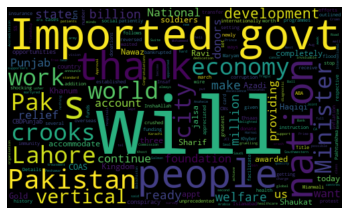

In [49]:
all_word = ' '.join([twts for twts in en_tweets['Tweets']])
wordCloud = WordCloud(width = 500, height = 300,random_state = 21, max_font_size = 119).generate(all_word)

plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()



In [50]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Netural'
    else:
        return 'Positive'
    
en_tweets['Analysis'] = en_tweets['Polarity'].apply(getAnalysis)
en_tweets

,tweet,Tweets,Subjectivity,Polarity,Analysis
2,Above all they have given themselves immunity ...,Above all they have given themselves immunity ...,0.100000,0.150000,Positive
3,Mianwali getting ready for the million people ...,Mianwali getting ready for the million people ...,0.625000,0.425000,Positive
5,While our Ehsaas social welfare programmes wer...,While our Ehsaas social welfare programmes wer...,0.333333,-0.053333,Negative
8,ABA number for wire transfer 113024009 In add...,ABA number for wire transfer 113024009 In add...,0.184848,0.045455,Positive
9,I thank our overseas donors who waited patient...,I thank our overseas donors who waited patient...,0.000000,0.000000,Netural
13,I also want to thank millions of donors &amp; ...,I also want to thank millions of donors suppo...,0.900000,0.200000,Positive
14,as well as our diagnostic centres in Karachi &...,as well as our diagnostic centres in Karachi ...,0.180556,-0.097222,Negative
15,I am delighted to announce that Shaukat Khanum...,I am delighted to announce that Shaukat Khanum...,0.450000,0.210000,Positive
17,Congratulations to Crown Prince Mohammed bin S...,Congratulations to Crown Prince Mohammed bin S...,0.454545,0.136364,Positive
19,Tragic army heli crash in which 6 soldiers wer...,Tragic army heli crash in which 6 soldiers wer...,0.716667,0.050000,Positive


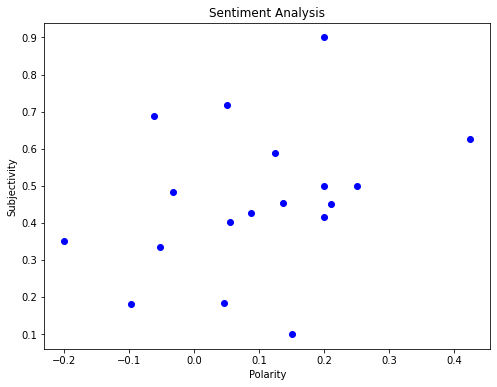

In [51]:
plt.figure(figsize=(8,6))
for i in range(0,en_tweets.shape[0]):
    plt.scatter(en_tweets['Polarity'].iloc[i],en_tweets['Subjectivity'].iloc[i],color='Blue'
               )
    
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

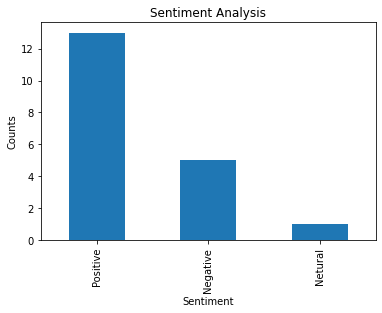

In [54]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
en_tweets['Analysis'].value_counts().plot(kind='bar')
plt.show()